In [2]:
import pandas as pd
ice_df = pd.read_csv('icecream1.csv')
print('done')

done


In [4]:
# converting string to time
ice_df['Time Reported Actual'] = pd.to_datetime(ice_df['Time Reported'], format='%I:%M %p')

ice_df['Time Reported Actual'] = ice_df['Time Reported Actual'].dt.strftime('%-I:%M %p')
ice_df.head(5)

,Created Date,Date Reported,Time Reported,Complaint Type,Borough,Time Reported Actual
0,4/1/25 18:59,4/1/25,6:59 PM,Noise,BROOKLYN,6:59 PM
1,4/1/25 18:29,4/1/25,6:29 PM,Noise,BRONX,6:29 PM
2,4/1/25 16:47,4/1/25,4:47 PM,Noise,BROOKLYN,4:47 PM
3,4/1/25 16:44,4/1/25,4:44 PM,Noise,BRONX,4:44 PM
4,4/1/25 13:38,4/1/25,1:38 PM,Noise,BROOKLYN,1:38 PM


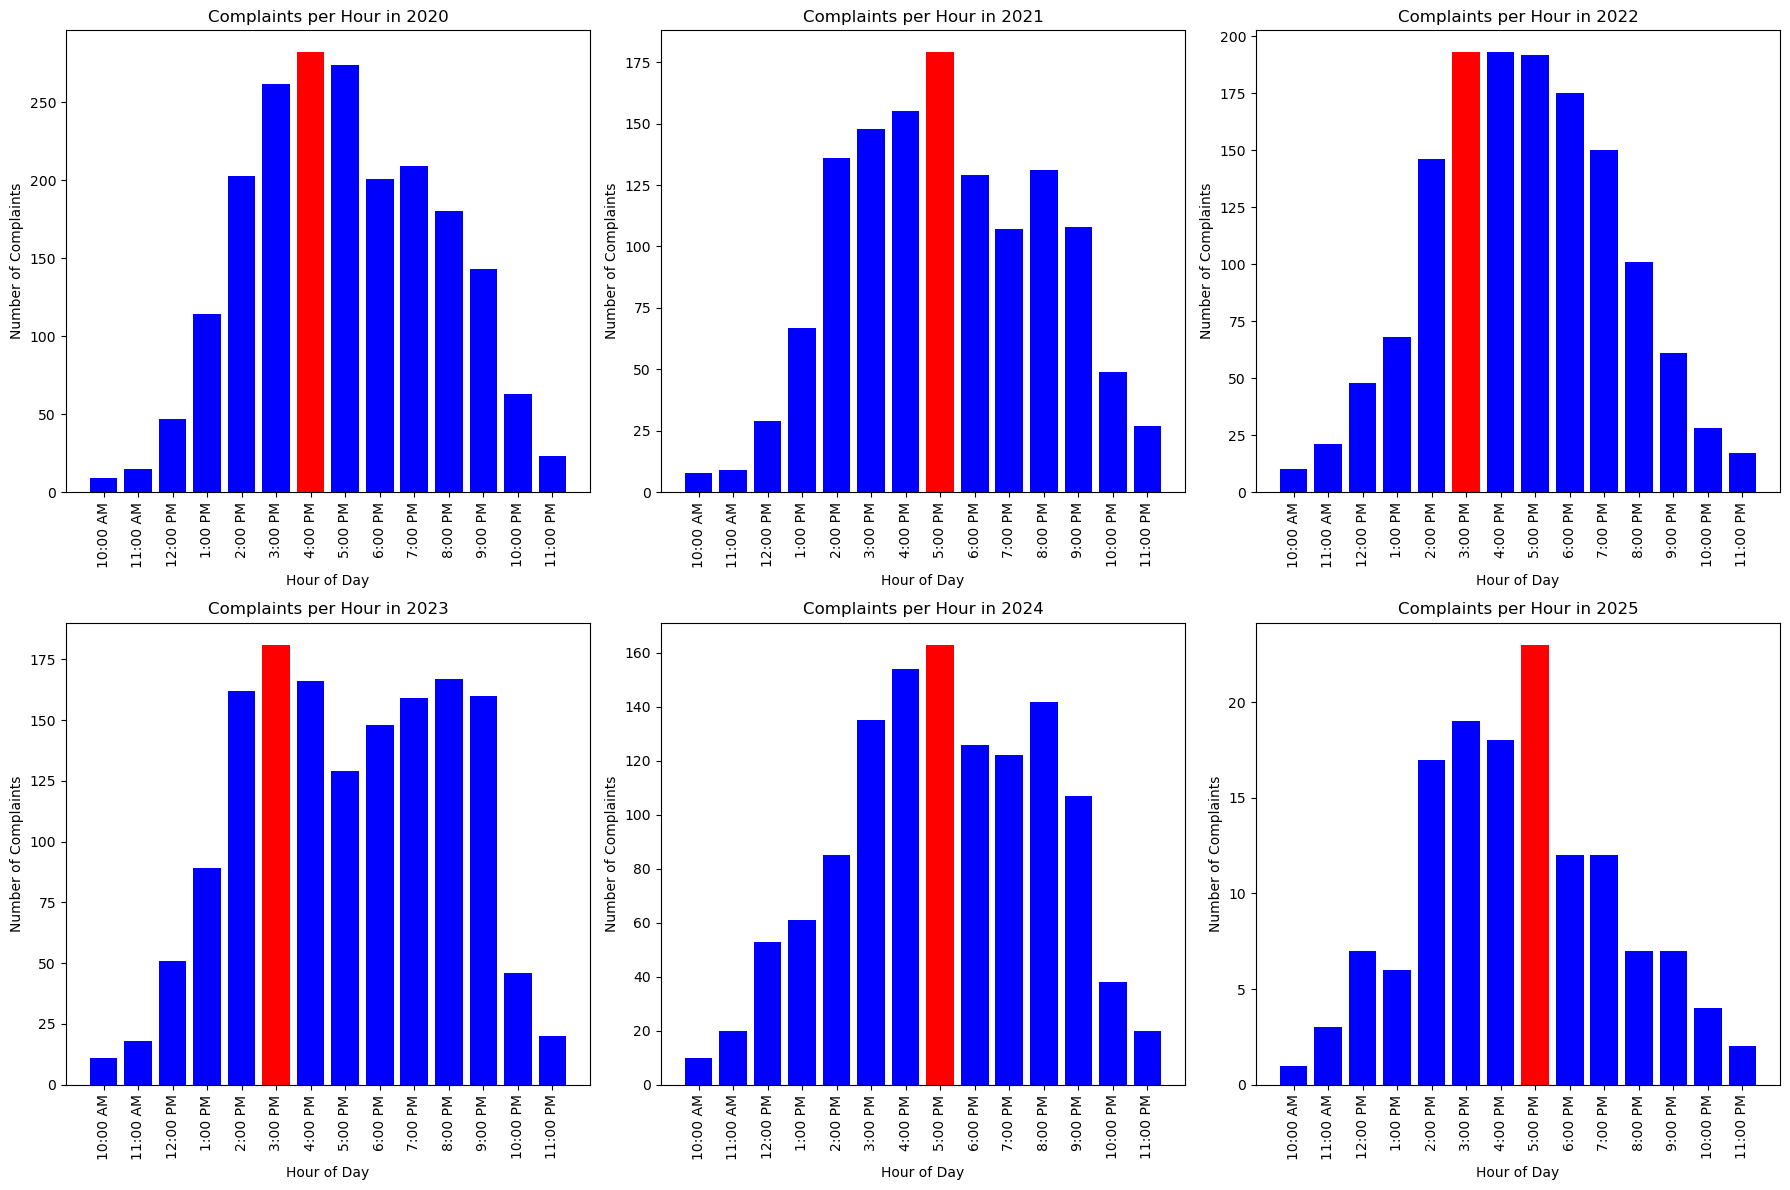

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

ice_df['Created Date'] = pd.to_datetime(ice_df['Created Date'])
ice_df['Time Reported Actual'] = pd.to_datetime(ice_df['Time Reported Actual'])
ice_df['Year'] = ice_df['Created Date'].dt.year
ice_df['Hour'] = ice_df['Time Reported Actual'].dt.hour

#filter data between 2020-2025
ice_df_fil = ice_df[(ice_df['Year'] >= 2020) & (ice_df['Year'] <= 2025)]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

year = 2020
for ax in axes:
    year_data = ice_df_fil[ice_df_fil['Year'] == year]
    
    if not year_data.empty:
        h_counts = year_data['Hour'].value_counts().sort_index()
        h_counts = h_counts[h_counts.index >= 10]  
        top_hour = h_counts.idxmax()  
        top_complaints = h_counts.max() 
    
        for hour in h_counts.index:
            color = 'red' if hour == top_hour else 'blue'
            ax.bar(hour, h_counts[hour], color=color)
        
        ax.set_title(f'Complaints per Hour in {year}')
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Number of Complaints')

        ax.set_xticks(range(10, 24)) 
        ax.set_xticklabels([f'{((x - 1) % 12) + 1}:00 {"AM" if x < 12 else "PM"}' for x in range(10, 24)])
        ax.tick_params(axis='x', rotation=90)
    else:
        ax.axis('off') 

    year += 1 

plt.tight_layout()

#show the plot
plt.show()